# Analysis of Airbnb Dataset

## Problem:

**The data-set aims to answer the following key questions:**

- Do various predicting factors really affect the rental price of a property and which of these variables are actually affecting the rental price?
- Does the type of room affect the rental price?
- What is the impact of rating score on the rental price?
- Does the rental price have any positive or negative correlation with the number of people the room can accomodate, the number of bathrooms, the number of beds etc.
- Does rental score have a negative relationship with cancellation policy?

------------------------------

## Attribute Information:

- id:	Property ID
- room_type: Type of Room in the property
- accommodates:	How many adults can this property accomodates
- bathrooms: Number of bathrooms in the property
- cancellation_policy: Cancellation policy of the property
- cleaning_fee: This denotes whether propoerty cleaning fee is included in the rent or not
- instant_bookable:	It indicates whether instant booking facility is available or not
- review_scores_rating:	Review rating score of the property
- bedrooms:	Number of bedrooms in the property
- beds:	Total number of beds in the property
- log_price: Log of rental price of the property for a fixed period

## Importing Necessary Libraries such as pandas, numpy, matplotlib.pyplot, seaborn

In [1]:
#import all neccesary libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## Reading the data from a .csv file

In [2]:
#read csv into a dataframe called 'data'
data = pd.read_csv('C:/Users/zeezu/Desktop/Python Coding/csv/AirBNB_dataset.csv')

In [3]:
#copying the data frame into a new data frame to retain original data.
df = pd.DataFrame(data)

## Checking 10 random rows

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that I get the same random results every time
np.random.seed(1)
df.sample(10)

There are 74111 rows and 11 columns.


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
56850,13586614,Entire home/apt,5.0,2.0,strict,False,f,100.0,2.0,3.0,7.408531
68140,18222981,Private room,3.0,1.0,strict,True,f,95.0,1.0,2.0,4.605170
23189,13915528,Entire home/apt,2.0,1.0,strict,True,f,95.0,1.0,2.0,4.094345
47255,7122067,Private room,1.0,1.0,flexible,False,f,100.0,1.0,1.0,4.317488
45933,12384924,Entire home/apt,5.0,2.0,strict,True,f,95.0,2.0,3.0,5.433722
66955,3999628,Private room,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.010635
18553,4948442,Entire home/apt,1.0,1.0,strict,False,f,NaN,0.0,1.0,5.010635
26117,666837,Shared room,16.0,2.0,flexible,False,f,76.0,1.0,1.0,2.708050
65737,15929932,Entire home/apt,10.0,1.0,strict,False,f,93.0,2.0,2.0,4.976734
8915,21173263,Entire home/apt,3.0,1.0,strict,True,f,95.0,0.0,2.0,4.700480


### Observations

* The data has 11 columns, which seem to be filled asides from the `review_scores_rating` column.
* `room_type`, `cancellation_policy`, `cleaning_fee` and `instant_bookable` are all categorical variables. 

## Checking the info of the dataset

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


### Observations

* There are some missing values in some of the columns which we shall have to act upon.
* There are three data types represented across all columns: float64, int64 and object.
* `room_type`, `cancellation_policy`, `cleaning_fee` and `instant_bookable` need to be changed from object types to categorical types.
* the `id` column is going to be dropped because it's not needed.
* The dependent variable is `log_price`.


## Checking a description of the data

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,74111,NaN,NaN,NaN,1.12666e+07,6.08173e+06,344,6.26196e+06,1.22541e+07,1.64023e+07,2.12309e+07
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108,NaN,NaN,NaN,3.15512,2.1536,1,2,2,4,16
bathrooms,73908,NaN,NaN,NaN,1.23527,0.582054,0,1,1,1,8
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389,NaN,NaN,NaN,94.0674,7.83656,20,92,96,100,100
bedrooms,74019,NaN,NaN,NaN,1.2658,0.852149,0,1,1,1,10
beds,73980,NaN,NaN,NaN,1.71087,1.25414,0,1,1,2,18


### Observations

* `room_type` and `cancellation_fee` have 3 unique variables, while `cleaning_fee` and `instant_bookable` have 2.

In [7]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [8]:
df.isnull().any()

id                      False
room_type                True
accommodates             True
bathrooms                True
cancellation_policy      True
cleaning_fee             True
instant_bookable        False
review_scores_rating     True
bedrooms                 True
beds                     True
log_price               False
dtype: bool

Here total missing values and null count from each column is 0 and we can see there is no missing or null values in the dataframe.

## Processing columns


In [9]:
df.head(10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
6,11825529,Entire home/apt,3.0,1.0,moderate,True,t,97.0,1.0,1.0,4.418841
7,13971273,Entire home/apt,2.0,1.0,moderate,True,f,93.0,1.0,1.0,4.787492
8,180792,Private room,2.0,1.0,moderate,True,f,99.0,1.0,1.0,4.787492
9,5385260,Private room,2.0,1.0,moderate,True,t,90.0,1.0,1.0,3.583519


### Observations

* The only column that needs to be processed is the `instant_bookable`, where it can be assumed that the 't' and 'f' stand for true or false, indicating whether the room is instantly bookable or not.

In [10]:
#Changing the values in the instant_bookable column from t & f to true and false. 

df['instant_bookable'] = [val.replace('t','True') for val in df['instant_bookable']]
df['instant_bookable'] = [val.replace('f','False') for val in df['instant_bookable']]

In [11]:
#Checking to make sure changes took effect

df.head(5)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,False,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,True,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,True,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,False,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,True,40.0,0.0,1.0,4.744932


# Data Preprocessing

### Fixing the categorical types

In [12]:
#Changing the types from object to categorical

df['room_type'] = df.room_type.astype('category')
df['cancellation_policy'] = df.cancellation_policy.astype('category')
df['cleaning_fee'] = df.cleaning_fee.astype('category')
df['instant_bookable'] = df.instant_bookable.astype('category')

In [13]:
#Checking to ensure changes took effect properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    74111 non-null  int64   
 1   room_type             74106 non-null  category
 2   accommodates          74108 non-null  float64 
 3   bathrooms             73908 non-null  float64 
 4   cancellation_policy   74103 non-null  category
 5   cleaning_fee          74107 non-null  category
 6   instant_bookable      74111 non-null  category
 7   review_scores_rating  57389 non-null  float64 
 8   bedrooms              74019 non-null  float64 
 9   beds                  73980 non-null  float64 
 10  log_price             74111 non-null  float64 
dtypes: category(4), float64(6), int64(1)
memory usage: 4.2 MB


The data types of the categorical variables have been fixed.

# Exploratory Data Analysis

## Univariate analysis

In [14]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(feature.mean(), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color='black', linestyle='-') # Add median to the histogram

### Lets explore the dependent variable log_price

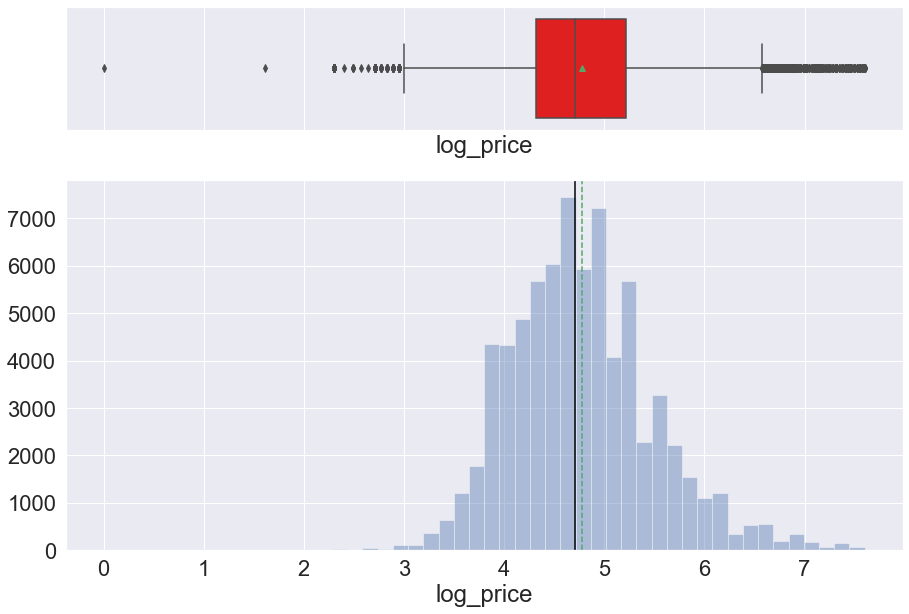

In [15]:
histogram_boxplot(df.log_price);

* The mean and median are relatively the same, indicating no skewness.
* The variable seems to follow a normal distribution, which is expected considering it is the log of the intial prices.
* There are a couple of outliers on both ends.
* The outlier on the far left indicating a property with a price of 0 could possibnly be an error.

### Lets the review_scores_rating column

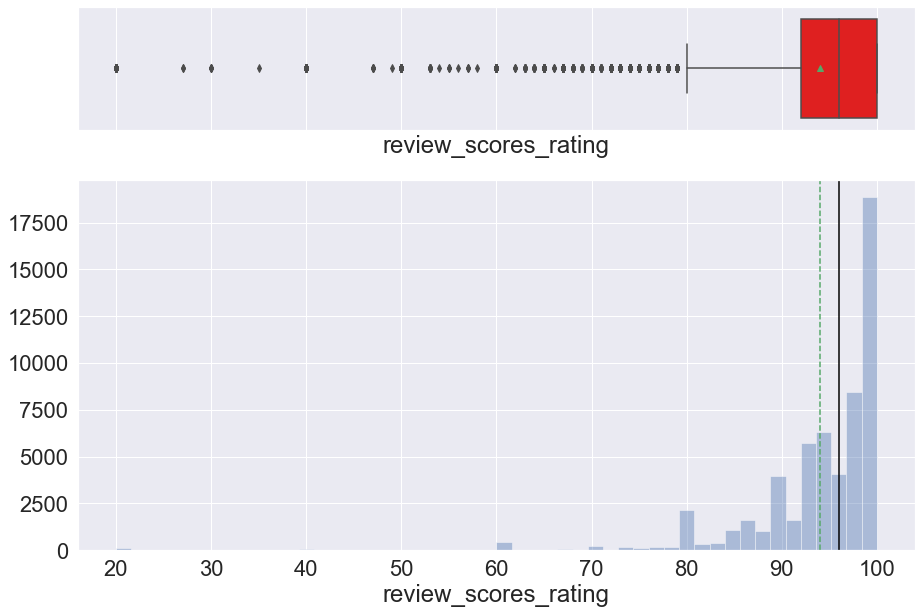

In [16]:
histogram_boxplot(df.review_scores_rating);

* The distribution is heavily left skewed.
* There are multiple outliers to the left of the distribution, but the majority of the ratings are between 90 to 100.

### Looking at the distributions for all numeric columns

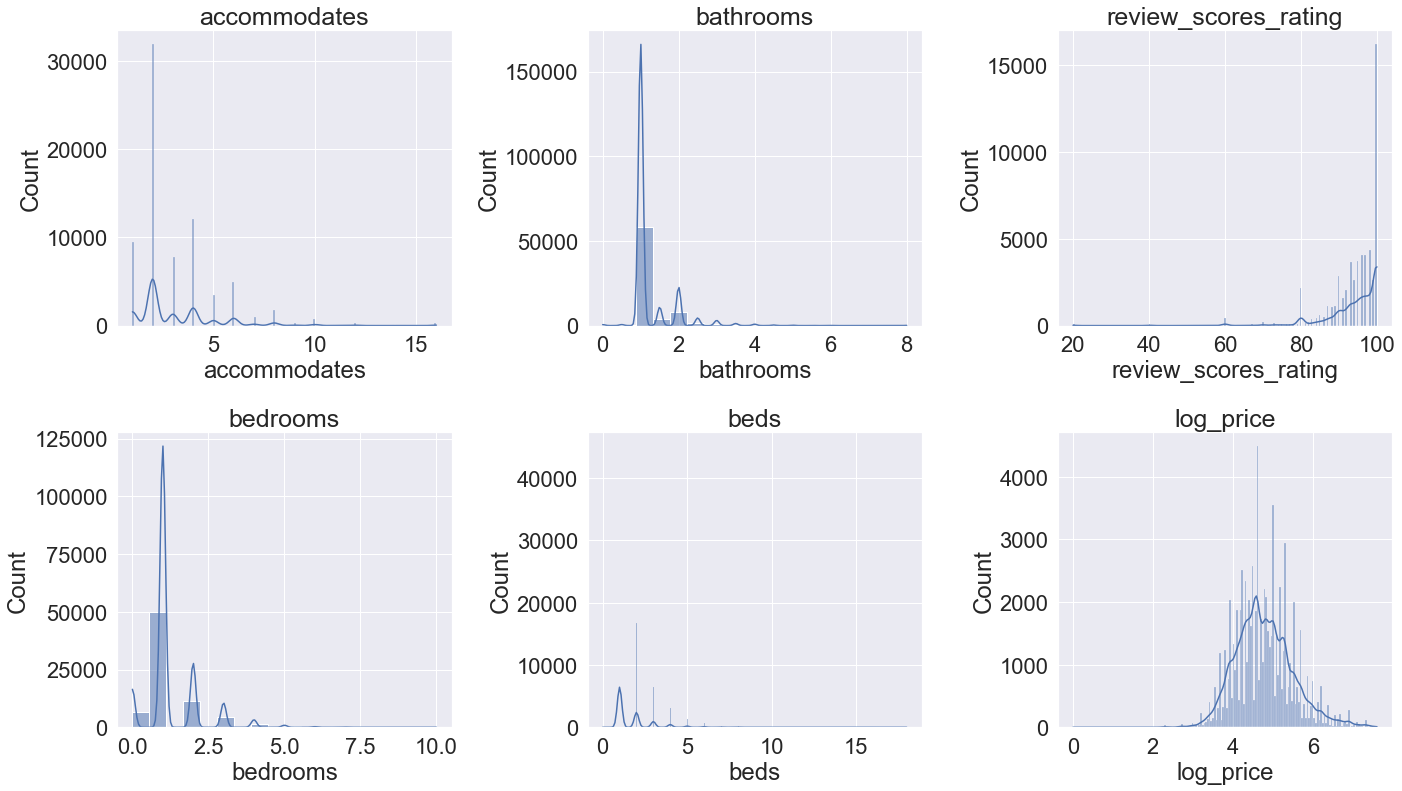

In [17]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('id')
plt.figure(figsize=(20,100))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    #plt.hist(df[all_col[i]])
    sns.histplot(df[all_col[i]], kde=True)   #you can comment the previous line and run this one to get distribution curves too
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

### Observations


* log_price and bedrooms are somewhat normally distributed.
* accomodates, bathrooms and beds are all right skewed while review_scores_rating is left skewed.
* accomodates being right skewed might be indicating that most properties can only be accomodated by fewer people compared to the ones that can accomodate a higher number.

### Looking at outliers in every numeric column

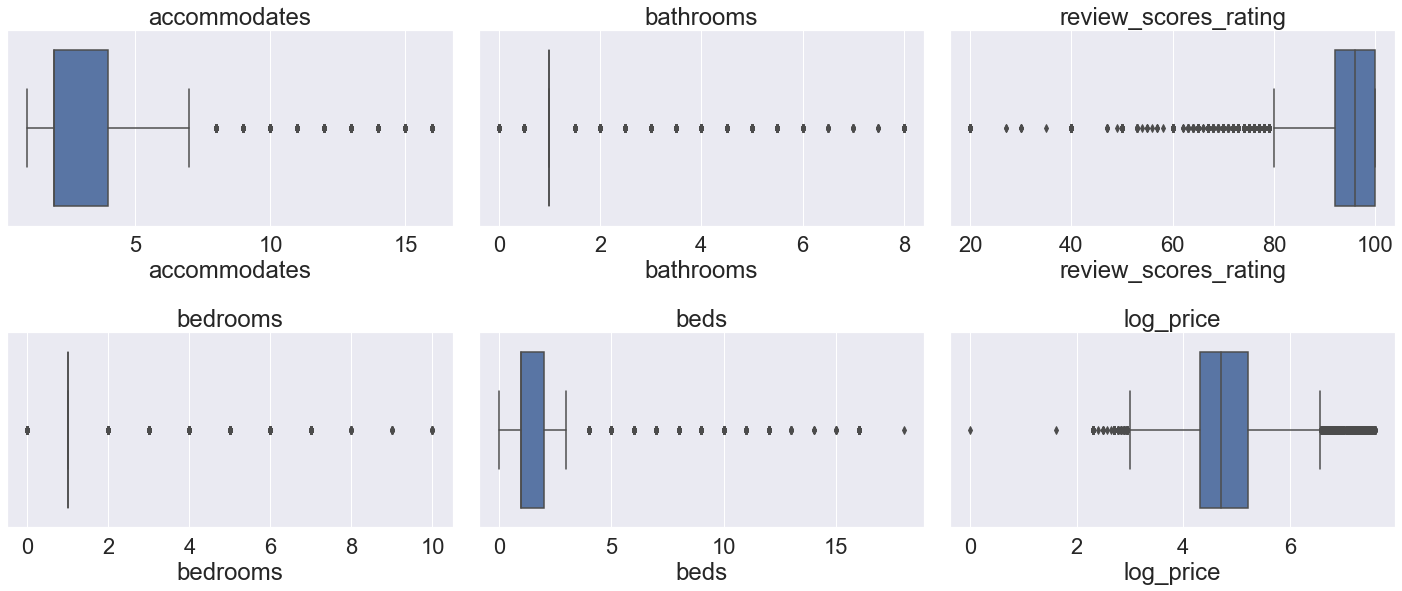

In [18]:
# lets plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20,75))

for i, variable in enumerate(all_col):
                     plt.subplot(18,3,i+1)
                     sns.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Observations

* For accommodates, bathrooms, bedrooms and beds, the outliers are mainly on the upper side. These might affect our model negatively and we might have to treat them but for now we shall leave them in because they might provide value to the model.

## Bivariate Analysis

We shall plot some graphs that shall help us take a look and understand some of the interactions between the numerous variables 

### Correlation

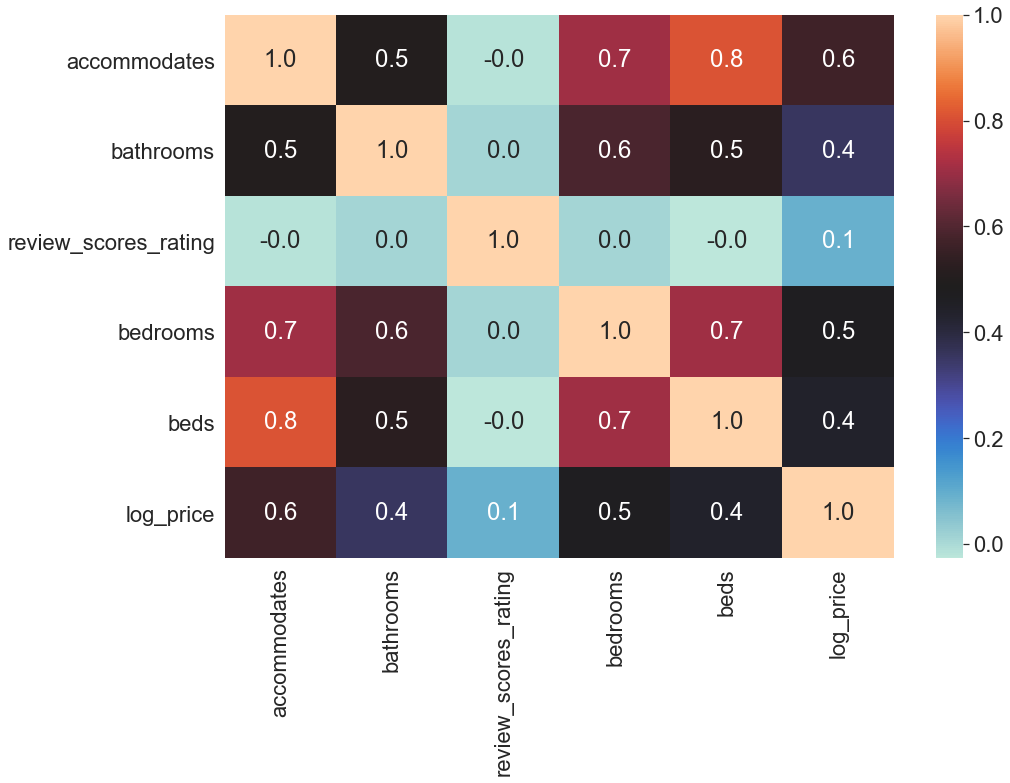

In [19]:
#We shall use a heat map to check the correlation between numerical variables

#Array containing the names of numerical variables
num_vals = ['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds', 'log_price'];
fig,ax = plt.subplots(figsize=(15,10));

sns.heatmap(df[num_vals].corr(),ax=ax,annot=True, cmap='icefire', fmt='.1f');

### Observations

* We can see some varibales seem to have some positive correlation such as beds and bedrooms or bedrooms and accommodates. These correlations could be indicating multiple notions such as if the number of bedrooms increases, so does the number of beds. The same thing goes for the number of beds against the number people accommodating the property.

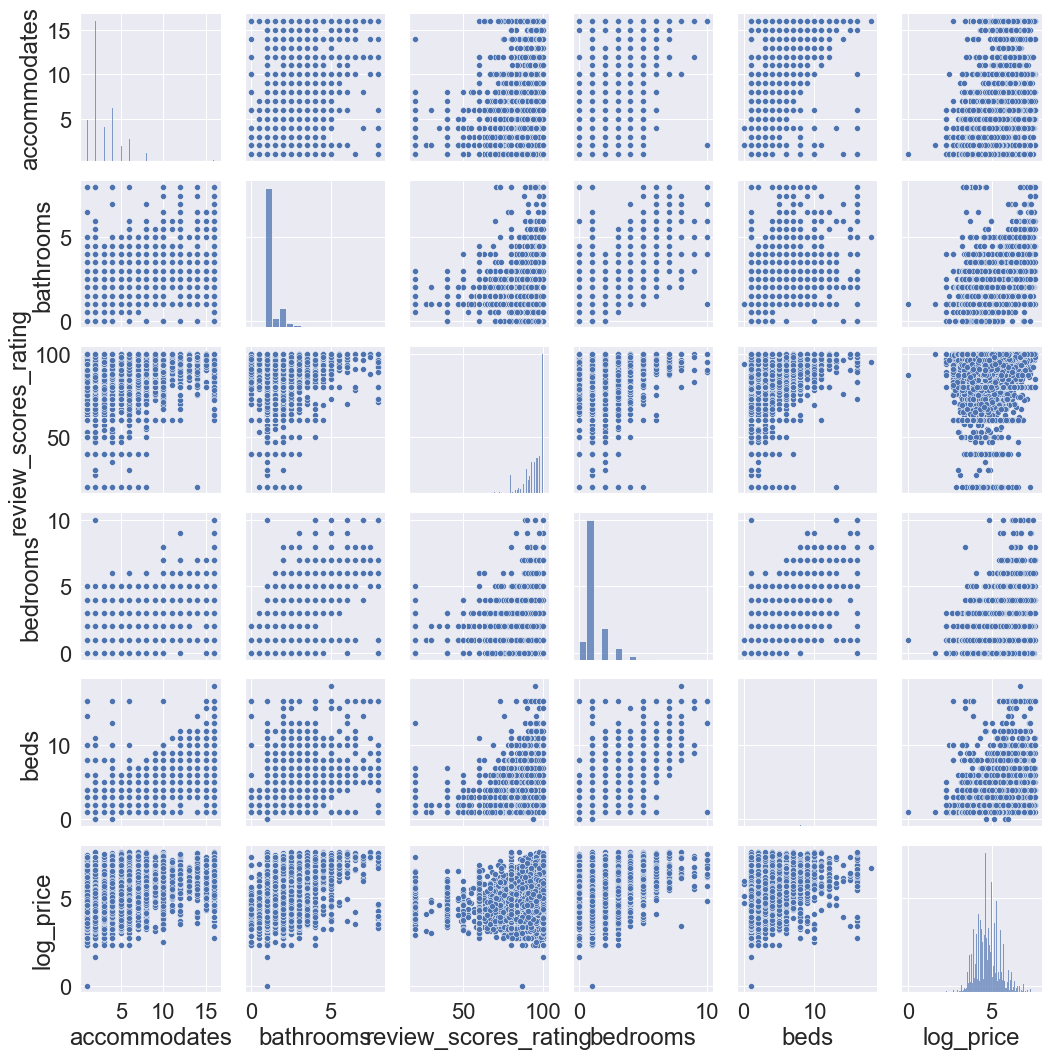

In [20]:
#Constructing numerous scatter plots of the numerical variables against one another
sns.pairplot(df[num_vals]);

* The scatterplot doesn't really tell us much face value, we can use regression plots for variables we believe to have high  correlation to confirm that.

## Let's look at regression plots of variables with high correlation 

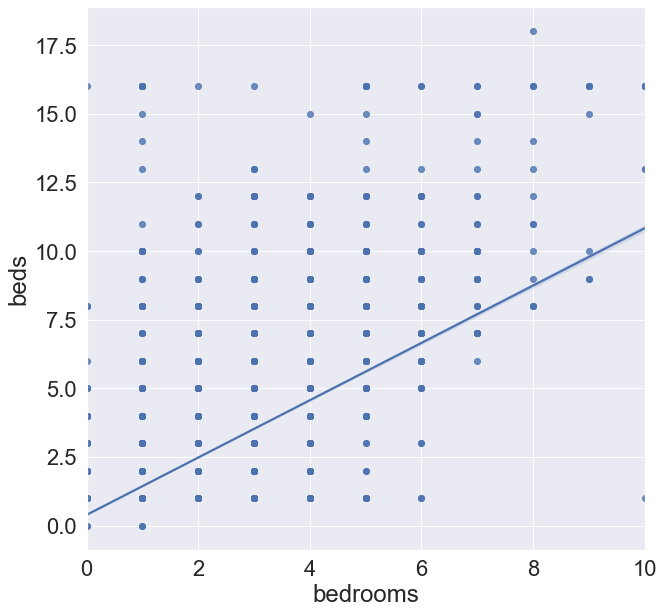

In [21]:
#We can create a regression plot that shall draw a regression line--
#--through the scatter plot to help us visualize the positive correlation

plt.figure(figsize=(10,10))
sns.regplot(x='bedrooms',y='beds', data=df); #Plotting a regression plot with bedrooms on the x-axis and beds on the y-axis

* This confirms the postive correlation between these two variables which might prove a problem when we want to build our model.

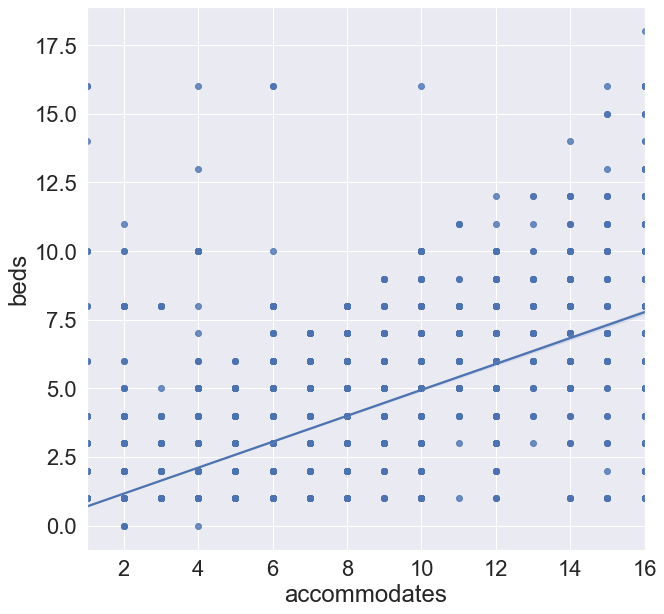

In [22]:
plt.figure(figsize=(10,10))
sns.regplot(x='accommodates',y='beds', data=df); #Plotting a regression plot with accommodates on the x-axis and beds on the y-axis

* The same goes for the positive correlation between beds and accommodates.

## Let's look at variables put against the log_price variable

### Log_price vs room_type

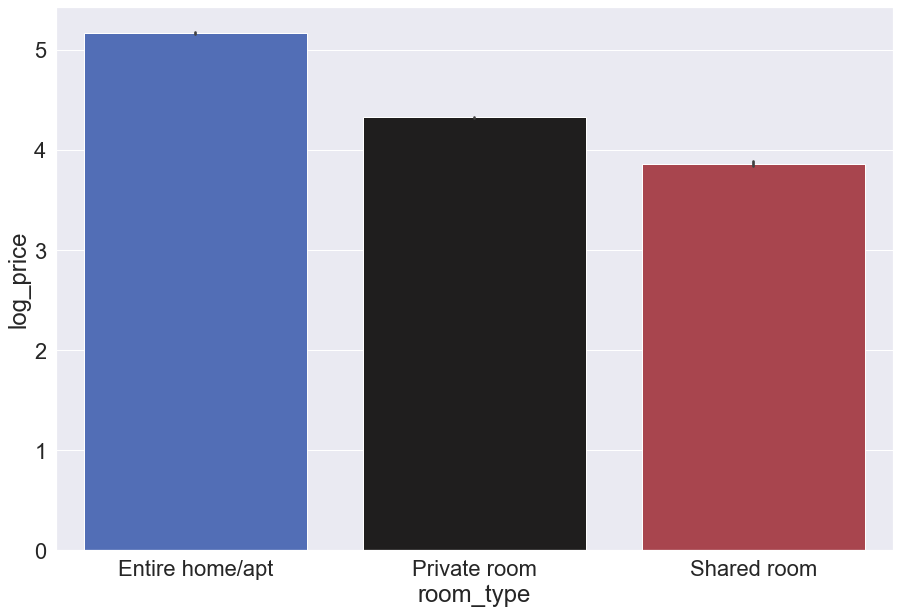

In [23]:
#Bar plot with room_type on the x-axis and log_price on the y-axis
plt.figure(figsize=(15,10))
sns.barplot(x='room_type', y='log_price', data=df, palette='icefire');

* This shows that the prices of entire homes are the highest compared to the prices of private rooms and shared rooms.

### Log_price vs bathrooms vs room_type

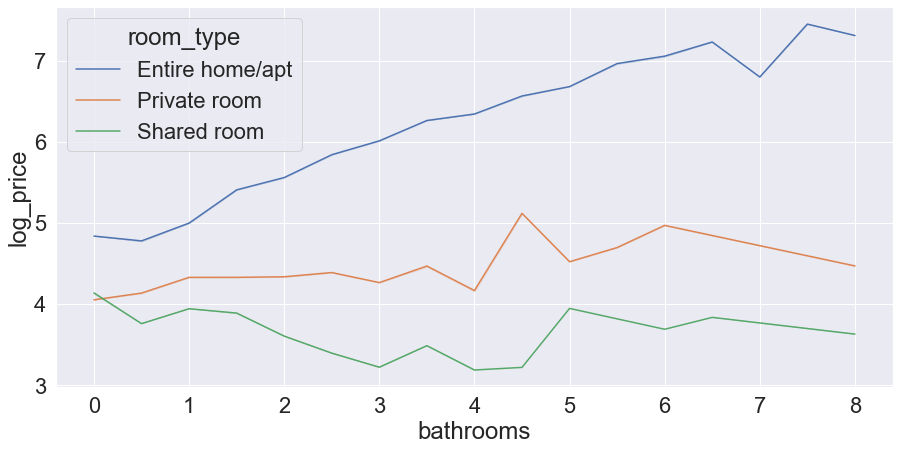

In [24]:
# Lineplot with bathrooms
plt.figure(figsize=(15,7))
sns.lineplot(x='bathrooms', y='log_price',hue='room_type',ci=0,
             data=df);

* This could be indicating that the prices of entire homes goes up as the number of bathrooms increases, but the same cannot be said for the other types of rooms.

--------


## Data Preparation

## Missing Value Treatment

In [25]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

review_scores_rating    16722
bathrooms                 203
beds                      131
bedrooms                   92
cancellation_policy         8
room_type                   5
cleaning_fee                4
accommodates                3
log_price                   0
instant_bookable            0
id                          0
dtype: int64

### Observations

* `review_scores_rating` has a high number of missing values, but it could be a major factor that affects `log_price`, so I shall drop the rows with missing values.
* For all the columns with missing values below 10, I shall just drop those rows.
* For `bathrooms`, `beds` and `bedrooms`, I shall impute the missing values.

### Treating missing values

In [26]:
# We will replace missing values in the 'bathrooms', 'bedrooms' and 'beds' columns with their medians

selected_columns = ['beds', 'bedrooms', 'bathrooms']

for s_column in selected_columns:
    df[s_column] = df[s_column].fillna(df[s_column].median())

In [27]:
#Checking if there are still missing values for those columns

for x in selected_columns:
    print(f'There are {df[x].isnull().sum()} missing values in the {x} column.')

There are 0 missing values in the beds column.
There are 0 missing values in the bedrooms column.
There are 0 missing values in the bathrooms column.


In [28]:
#Dropping the rest of the rows containing missing values

df = df.dropna()

In [29]:
#checking the whole dataset for missing values once more

df.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [30]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 57380 rows and 11 columns.


* There are no missing values in the dataset.
* because we have dropped some rows, we shall have a new count for the number of rows.

In [31]:
# Dropping the id column because it's not needed
df.drop(['id'],axis=1,inplace=True)

## Model Building

In [32]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,False,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,True,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,True,92.0,1.0,3.0,4.976734
4,Entire home/apt,2.0,1.0,moderate,True,True,40.0,0.0,1.0,4.744932
5,Private room,2.0,1.0,strict,True,True,100.0,1.0,1.0,4.442651


### Define dependent variable

In [33]:
ind_vars = df.drop(['log_price'], axis=1) 
dep_var = df[['log_price']]

print(ind_vars.head())
print(dep_var.head())

         room_type  accommodates  bathrooms cancellation_policy cleaning_fee  \
0  Entire home/apt           3.0        1.0              strict         True   
1  Entire home/apt           7.0        1.0              strict         True   
2  Entire home/apt           5.0        1.0            moderate         True   
4  Entire home/apt           2.0        1.0            moderate         True   
5     Private room           2.0        1.0              strict         True   

  instant_bookable  review_scores_rating  bedrooms  beds  
0            False                 100.0       1.0   1.0  
1             True                  93.0       3.0   3.0  
2             True                  92.0       1.0   3.0  
4             True                  40.0       0.0   1.0  
5             True                 100.0       1.0   1.0  
   log_price
0   5.010635
1   5.129899
2   4.976734
4   4.744932
5   4.442651


In [34]:
print(ind_vars.shape)
print(dep_var.shape)

(57380, 9)
(57380, 1)


### Creating dummy variables

In [35]:
#This function returns a dataframe where all categorical variables have been one hot encoded
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=[ "category"]).columns.tolist(),
        drop_first=True, #Dropping one column becuase the rest of the columns capture the information needed
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,0,0,1,0,1,1
4,2.0,1.0,40.0,0.0,1.0,0,0,1,0,1,1
5,2.0,1.0,100.0,1.0,1.0,1,0,0,1,1,1


### Split the data into train and test

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=124
)

In [37]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in train data =", X_test.shape[0])

Number of rows in train data = 40166
Number of rows in train data = 17214


In [38]:
X_train.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
48851,2.0,1.0,100.0,1.0,1.0,1,0,0,0,1,0
64034,2.0,1.0,100.0,1.0,1.0,0,0,0,0,1,0
65571,3.0,1.0,91.0,0.0,1.0,0,0,0,1,1,1
65963,1.0,1.0,95.0,1.0,1.0,1,0,0,1,1,0
69716,2.0,1.0,95.0,1.0,1.0,1,0,1,0,1,0


### Fitting a linear model

In [39]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["log_price"], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     4755.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:39:29   Log-Likelihood:                -24090.
No. Observations:               40166   AIC:                         4.820e+04
Df Residuals:                   40154   BIC:                         4.831e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

* The R-squared and the adjusted R-sqaured of our model is relatively average, indicating that the model predicts the data accurately at about 56% of the time on the training set.
* We will have to check if the linear regression assumptions have been satisfied.
* We will also see how the model does on the test data.

### Lets look at model performances

In [40]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)                              


# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

0.34187663225075987

* Our MAE is calculated as 0.34, which is decent.

In [41]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

0.442785015383544

* Having our RMSE as 0.44 is good considering we are trying to get it as low as possible.

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [42]:
# R-squared on test
r2_score(y_test, pred)

0.5610283436703812

In [43]:
# Training Score

linearregression.score(X_train, y_train)  # 70 % data 

0.5657016730915616

In [44]:
# Testing score

linearregression.score(X_test, y_test) # unseen data

0.5610283436703812

* $R^2$ value is 0.56, which means that this model's independent variables are able to explain 56% of the variance in the dependent variable.
* The training and test scores are 56.6% and 56.1% respectively, where both scores are comparable, hence we have a decent fit.

## Checking Linear Regression Assumptions

1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **No Heteroscedasticity**
4. **Linearity of variables**
5. **Normality of error terms**

### Checking Assumption 1: No Multicollinearity 

We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                         feature         VIF
0                          const  161.728759
1                   accommodates    4.168474
2                      bathrooms    1.554521
3           review_scores_rating    1.016051
4                       bedrooms    2.557436
5                           beds    3.479485
6         room_type_Private room    1.388365
7          room_type_Shared room    1.102522
8   cancellation_policy_moderate    1.693596
9     cancellation_policy_strict    1.796580
10             cleaning_fee_True    1.128008
11         instant_bookable_True    1.021410


* There's no multicollinearity in our data, therefore the first assumption is satisfied.

### Checking Assumption 2: Mean of residuals should be 0

In [46]:
residuals = olsmodel1.resid
np.mean(residuals)

2.4563331998789813e-15

* The mean of the residuals is quite close to 0, therefore the second assumption is satisfied.

### Checking Assumption 3: No Heteroscedasticity

* Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use `Goldfeldquandt Test` to test the following hypothesis

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05 

In [47]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.0193381525996768), ('p-value', 0.08743273493784122)]

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic. 

Assumptions 3 is also satisfied by our olsmodel1.

### Checking Assumption 4: Linearity of variables

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

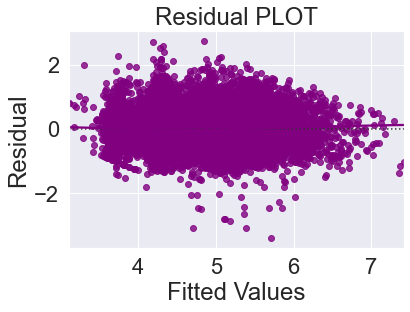

In [48]:
# predicted values
fitted = olsmodel1.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

* Assumption 4 is satisfied by our olsmodel1, there isn't a pattern in the residual vs fitted values plot.

### Checking Assumption 5: Normality of error terms

The residuals should be normally distributed.

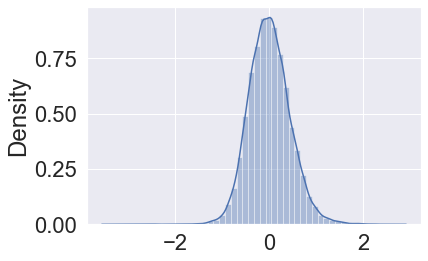

In [49]:
# Plot histogram of residuals
sns.distplot(residuals);

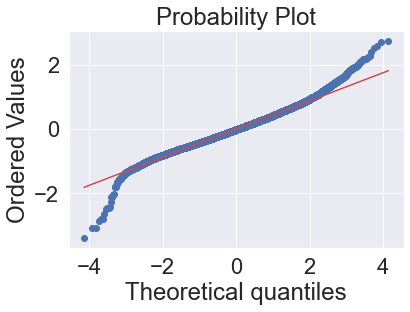

In [50]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals seem to follow a normal distribution. Assumption 5 is also satisfied.

Now that we have seen that olsmodel1 follows all the linear regression assumptions. Let us use that model to draw inferences.

In [51]:
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     4755.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:41:00   Log-Likelihood:                -24090.
No. Observations:               40166   AIC:                         4.820e+04
Df Residuals:                   40154   BIC:                         4.831e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Business Insights and Recommendations

* Our final model does averagely, with an adjusted $R^2$ of 56%.
* Bedrooms and bathrooms seem to have the most positive impact on the price of a property, pushing for more people to list more rooms with bathrooms in general could highly benefit the company. 
* The number of beds and type of room all affect the price negatively, especially if the room is a shared room, we could encourage hosts to enlist more private rooms and apartments and advise that shared rooms don't make as much profit.
* Cleaning fee having a very miniscule effect on the price could mean people do not neccessary bother about whether the fee is included or not.
* Whether the room is instantly bookable or not also affects the price negatively, we should encourage hosts to list rooms that are instantly bookable to try to curb that.